In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load dataset

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/Metabolic Syndrome.csv"
df = pd.read_csv(file_path)
display(df)


,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1


In [ ]:
# Checking for missing values
print(df.isnull().sum())

# Converting categorical values
df['MetabolicSyndrome'] = df['MetabolicSyndrome'].astype(int)

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64


Data cleaning and EDA

Missing Values:
 seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64


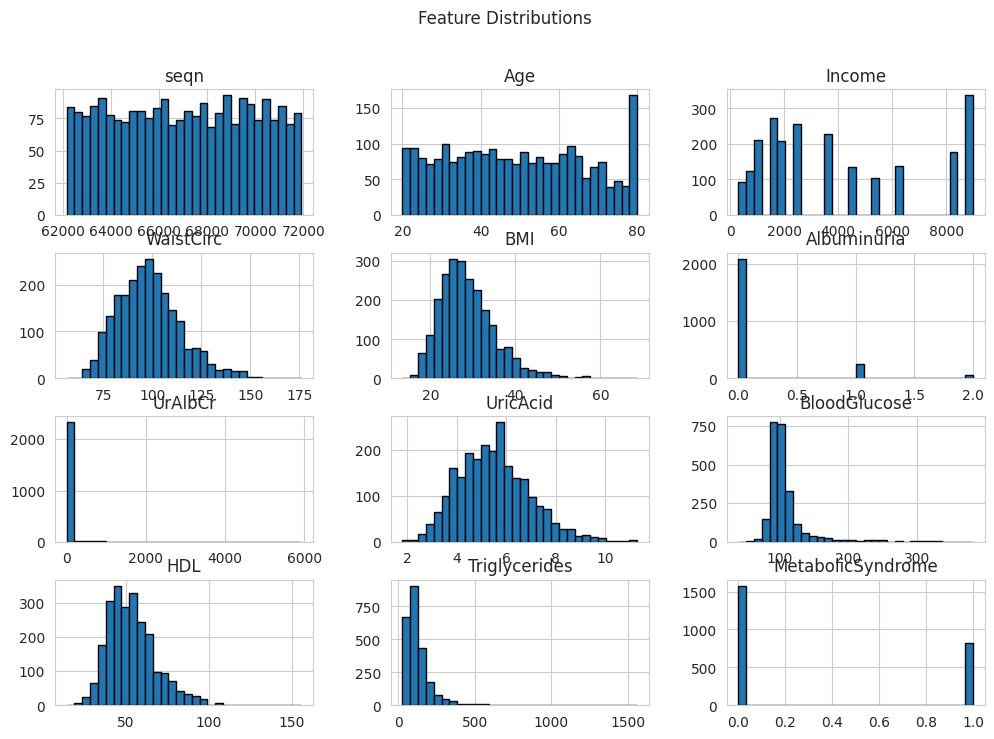

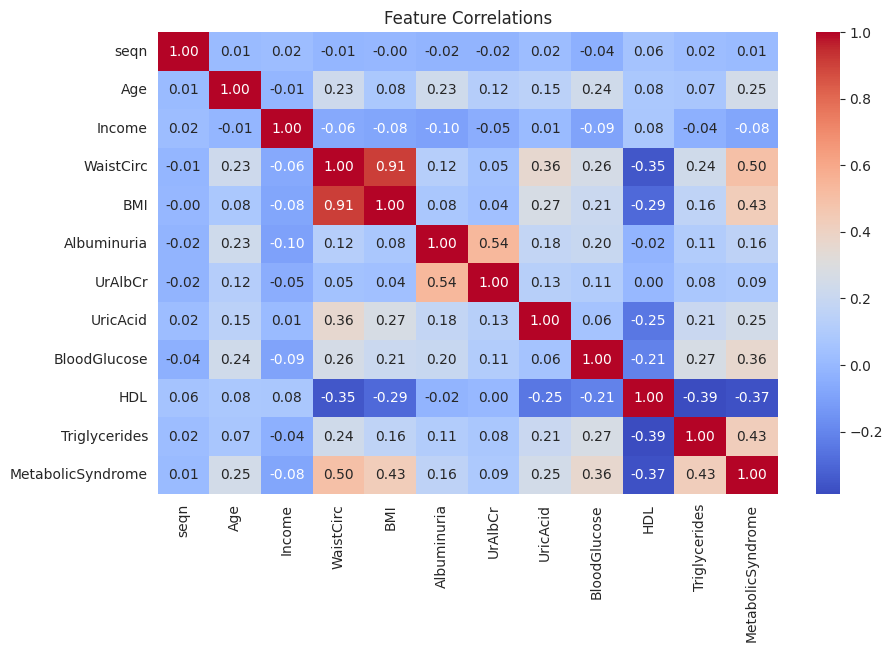

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing values
print("Missing Values:\n", df.isnull().sum())

# Set plot style
sns.set_style("whitegrid")

# Plot distributions of numerical features
numerical_features = df.select_dtypes(include=['number'])
numerical_features.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()


Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from IPython.display import display

# Convert categorical variables
categorical_cols = ['Sex', 'Marital', 'Race']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Fill missing values with column means
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
X = df.drop(columns=['BMI', 'MetabolicSyndrome'])  # Features
y = df['MetabolicSyndrome']  # Target for classification

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the modified DataFrame
display(df.head())  # Show the first few rows of the DataFrame

# Print some information about the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,1,3,8200.00000,5,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,0,1,4500.00000,5,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,1,3,800.00000,0,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,0,3,2000.00000,1,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,1,1,4005.25394,0,81.1,20.1,0,8.13,5.0,95,43,126,0


X_train shape: (1920, 13)
X_test shape: (481, 13)
y_train shape: (1920,)
y_test shape: (481,)


Regression (BMI Prediction)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features (X) and target (y) for Regression
X_reg = df.drop(columns=['BMI'])  # Features for regression
y_reg = df['BMI']  # Target for regression

# Normalize numerical features for Regression
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Split dataset for Regression (80% train, 20% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Train a Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluate performance
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Regression Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Regression Model Performance:
Mean Squared Error: 7.9699
Root Mean Squared Error: 2.8231
R² Score: 0.8187


Classification (Metabolic Syndrome Prediction)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a Logistic Regression model
clf_model = LogisticRegression(max_iter=500)
clf_model.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_clf = clf_model.predict(X_test_clf)

# Evaluate performance
accuracy = accuracy_score(y_test_clf, y_pred_clf)
report = classification_report(y_test_clf, y_pred_clf)

print(f"Classification Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(report)


Classification Model Performance:
Accuracy: 0.8254
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       324
           1       0.79      0.63      0.70       157

    accuracy                           0.83       481
   macro avg       0.81      0.78      0.79       481
weighted avg       0.82      0.83      0.82       481



Improved Regression (BMI Prediction)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Predict on test set
y_pred_rf_reg = rf_reg.predict(X_test_reg)

# Evaluate performance
mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print(f"Random Forest Regression Model Performance:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"Root Mean Squared Error: {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")


Random Forest Regression Model Performance:
Mean Squared Error: 8.6801
Root Mean Squared Error: 2.9462
R² Score: 0.8025


Improved classification (Metabolic Syndrome)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

# Predict on test set
y_pred_rf_clf = rf_clf.predict(X_test_clf)

# Evaluate performance
accuracy_rf = accuracy_score(y_test_clf, y_pred_rf_clf)
report_rf = classification_report(y_test_clf, y_pred_rf_clf)

print(f"Random Forest Classification Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(report_rf)


Random Forest Classification Model Performance:
Accuracy: 0.8815
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       324
           1       0.84      0.79      0.81       157

    accuracy                           0.88       481
   macro avg       0.87      0.86      0.86       481
weighted avg       0.88      0.88      0.88       481



Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_reg, cv=5, scoring='r2')
grid_search_reg.fit(X_train_reg, y_train_reg)

# Best parameters
print("Best Parameters for Regression:", grid_search_reg.best_params_)


Best Parameters for Regression: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


Classification Hyperparameter Tuning

In [ ]:
# Define parameter grid
param_grid_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_clf, cv=5, scoring='accuracy')
grid_search_clf.fit(X_train_clf, y_train_clf)

# Best parameters
print("Best Parameters for Classification:", grid_search_clf.best_params_)


Best Parameters for Classification: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


Regression Feature Importance

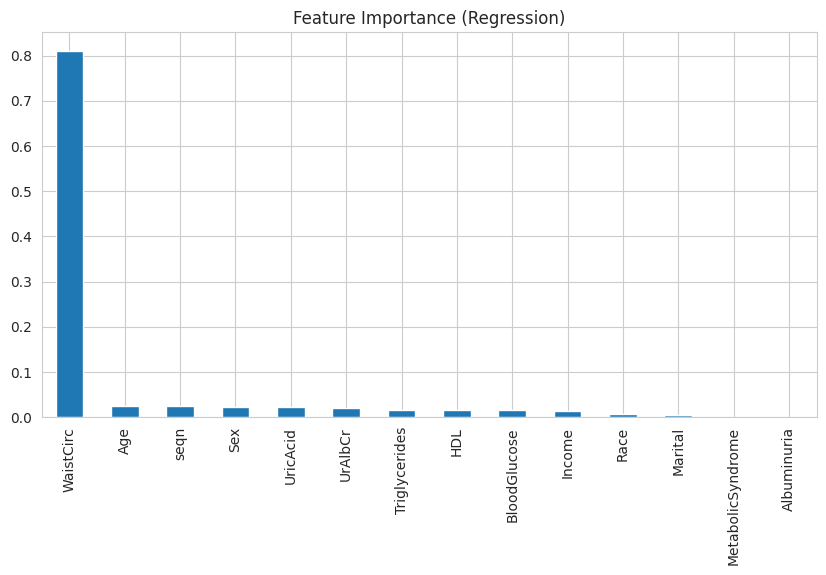

In [ ]:
feature_importance_reg = pd.Series(rf_reg.feature_importances_, index=X_reg.columns)
feature_importance_reg.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance (Regression)")
plt.show()


Classification Feature Importance

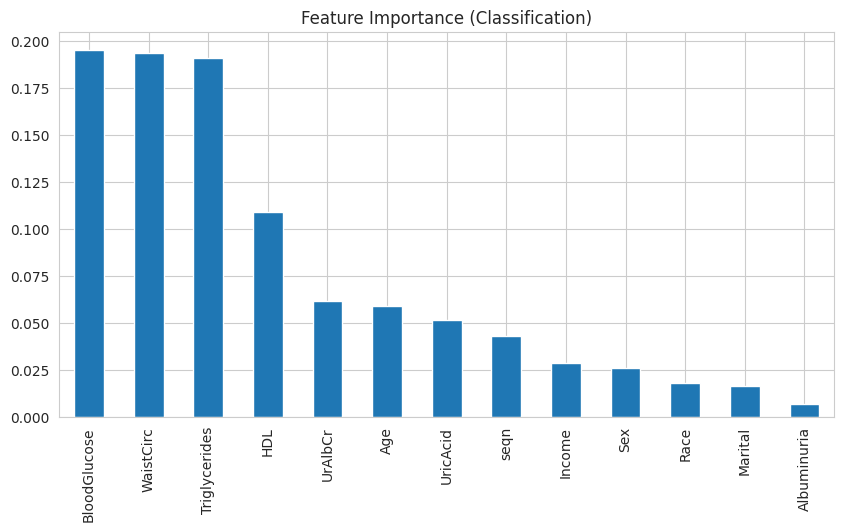

In [ ]:
feature_importance_clf = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importance_clf.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance (Classification)")
plt.show()
